# Import library

In [45]:
import pandas as pd
import os
from sqlalchemy import create_engine
import numpy as np
from tqdm._tqdm_notebook import tqdm_notebook
import seaborn as sns
import matplotlib.pyplot as plt
tqdm_notebook.pandas(desc='PROGRESS>>>')

# About the data

The data here is the survey responses that we collected from TINYpulse system for the question "How happy are you at work"

This question is a scale question with the score from 1 to 10 and user will give the score with the text responses for there thought on the score that they gave

Trying to use NLP by letting the machine learn about the score and response text, we are trying to build a model for TINYpulse system to predict the text response for only text question is negative, positive or neutral and we can reduce the time that a user need to pay attention to read all the response text

# Load CSV file

In [47]:
responses_df = pd.read_csv('ccs.csv', encoding="latin1")
responses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16225 entries, 0 to 16224
Data columns (total 3 columns):
submitted_at        16225 non-null object
response_integer    16225 non-null int64
response_text       16178 non-null object
dtypes: int64(1), object(2)
memory usage: 380.4+ KB


**some responses that have N/A value for question_response_more (user still answer the question with the score, but leave the comment with text N/A)**

In [48]:
responses_df[responses_df.response_text.isna()]

,submitted_at,response_integer,response_text
588,2017-01-30 11:39:38,9,NaN
2253,2017-03-08 18:25:19,3,NaN
3435,2017-04-20 18:49:38,1,NaN
4427,2017-02-20 13:45:32,9,NaN
4685,2017-06-14 17:23:11,10,NaN
4710,2017-06-15 00:55:39,10,NaN
4904,2017-08-14 18:38:27,10,NaN
4969,2017-08-14 18:49:42,5,NaN
5125,2017-10-18 10:00:21,10,NaN
5240,2017-11-23 15:59:11,9,NaN


We don't need those responses and it could affect the train model, so we cleaning it up

In [49]:
responses_df = responses_df.dropna()

In [50]:
score_distribution = responses_df['response_integer'].value_counts().sort_index()

In [51]:
score_distribution

1      693
2      535
3      924
4      857
5     1727
6     1538
7     2346
8     2844
9     2135
10    2579
Name: response_integer, dtype: int64

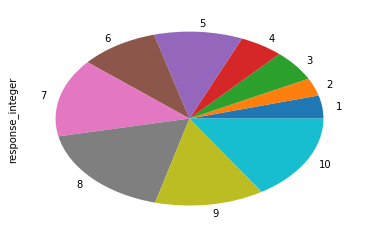

In [52]:
score_distribution.plot(kind='pie')

# Classify the response score into 3 type: 

- 1,2,3,4 -> Negative
- 5,6-> Neutral
- 7,8,9,10 -> Positive

In [54]:
def sentiment_score(score):
    if score < 5:
        return -1 #'negative'
    elif score > 6:
        return 1 #'positive'
    else:
        return 0 #'neutral'

In [55]:
responses_df['sentiment'] = responses_df['response_integer'].progress_apply(sentiment_score)

In [56]:
responses_df.head(10)

,submitted_at,response_integer,response_text,sentiment
0,2017-10-10 23:58:05,6,I'm not sure about other team; but my team doe...,0
1,2017-11-13 03:56:38,7,Got a lot of very talented engineers. We still...,1
2,2018-01-09 03:26:55,7,I can always do a better job of giving off bet...,1
3,2018-01-03 01:47:36,9,âI love to work here; I donât want to find...,1
4,2018-01-02 22:26:01,8,Attitude is a little thing that makes a big di...,1
5,2018-01-02 22:42:33,7,Feedback is usually positive for my work and I...,1
6,2017-10-16 09:12:18,4,I don't think we have retrospectives anymore.....,-1
7,2017-10-11 03:08:58,5,Attach retrospective as a mandatory item in ev...,0
8,2017-11-13 09:23:04,6,I think our company has much thing to improve;...,0
9,2017-11-21 10:37:18,8,Really big freedom and more accountability,1


# Take a look with the sentiment:

In [57]:
responses_df['sentiment'].value_counts()

 1    9904
 0    3265
-1    3009
Name: sentiment, dtype: int64

**Look like the number of `Negative` responses is quite small, it could affect the training for predicting the Negative, but keep going with the input data, we will improve the data input later**

**_TODO_**: Increase the response with `Negative` value, so that the model could recognize the `Negative` response better (**we hope**)

**Result**: We tried to classify the Negative, Positive and Neutral value of a response by looking at the chart and the distribution of score value:
* At the first time, we try to balance the number of response in Neg, Pos and Neu, but the accuracy is going down:
 * 9,10 -> Positive
 * 6,7,8 -> Neutral
 * 1,2,3,4,5 -> Negative

* Then we try to increase the Neutral value, and balance for the Positive and Negative that mean we have more neutral response, but the accuracy value is not increased:
 * 9,10 -> Positive
 * 5,6,7,8 -> Neutral
 * 1,2,3,4 -> Negative

**Getting the dataframe for processing data:**

In [58]:
nlp_df = responses_df[['response_text', 'sentiment']]

In [59]:
nlp_df.head(20)

,response_text,sentiment
0,I'm not sure about other team; but my team doe...,0
1,Got a lot of very talented engineers. We still...,1
2,I can always do a better job of giving off bet...,1
3,âI love to work here; I donât want to find...,1
4,Attitude is a little thing that makes a big di...,1
5,Feedback is usually positive for my work and I...,1
6,I don't think we have retrospectives anymore.....,-1
7,Attach retrospective as a mandatory item in ev...,0
8,I think our company has much thing to improve;...,0
9,Really big freedom and more accountability,1


**Using regular expression to remove not alphabet character, by replacing them with space character:**

In [60]:
import re
first_text=nlp_df.response_text[71]
text=re.sub("[^a-zA-Z]"," ",first_text) #changing characters with space
text=text.lower()

**Lets review of changing:**

In [61]:
print(nlp_df.response_text[71])
print(text)

I can make a much greater impact here due to the ability to help companies save a ton of money. I think that's pretty awesome.
i can make a much greater impact here due to the ability to help companies save a ton of money  i think that s pretty awesome 


### Stopwords

In [62]:
#stopwords (irrelavent words)
import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('wordnet')
from nltk.corpus import stopwords
text=nltk.word_tokenize(text) #separate all words

[nltk_data] Downloading package stopwords to /Users/anvo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/anvo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/anvo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [63]:
text

['i',
 'can',
 'make',
 'a',
 'much',
 'greater',
 'impact',
 'here',
 'due',
 'to',
 'the',
 'ability',
 'to',
 'help',
 'companies',
 'save',
 'a',
 'ton',
 'of',
 'money',
 'i',
 'think',
 'that',
 's',
 'pretty',
 'awesome']

### Lemmatization: 
ex: employees --> employee

In [64]:
import nltk as nlp
lemma=nlp.WordNetLemmatizer()
text=[lemma.lemmatize(i) for i in text]
text=" ".join(text)
text

'i can make a much greater impact here due to the ability to help company save a ton of money i think that s pretty awesome'

## Applying tokenize and lemmatize for all response text

In [65]:
text_list=[]
for resp in nlp_df.response_text:
    text=re.sub("[^a-zA-Z]"," ",str(resp))
    text=text.lower()
    text=nltk.word_tokenize(text)
    lemma=nlp.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text]
    text=" ".join(text)
    text_list.append(text)

In [66]:
text_list[:10]

['i m not sure about other team but my team doesn t ha retrospective',
 'got a lot of very talented engineer we still need more discipline around process and product quality',
 'i can always do a better job of giving off better energy i think by nature i m a bit low key and can be lethargic at time so it s a real effort to show high energy for me',
 'i love to work here i don t want to find another company again ahihi',
 'attitude is a little thing that make a big difference',
 'feedback is usually positive for my work and i feel like most of my interaction with teammate are also positive',
 'i don t think we have retrospective anymore at least our team hasn t had any for a few month now',
 'attach retrospective a a mandatory item in every sprint planning and follow action item to the end i can see day by day we are losing enthusiasm to raise concern it s better to build habit for team member to raise their voice whenever they have thing need to be improved instead of thought what will

## bag of words

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
max_features=400000
cou_vec=CountVectorizer(max_features=max_features,stop_words="english")
sparce_matrix=cou_vec.fit_transform(text_list).toarray()
all_words=cou_vec.get_feature_names()
print("Most used words: ", all_words[0:100])

Most used words:  ['aa', 'aad', 'aaron', 'ab', 'abandoned', 'abbreviate', 'abc', 'aber', 'abide', 'abiity', 'ability', 'abismal', 'able', 'abnormal', 'abo', 'abraham', 'abreast', 'abroad', 'abrupt', 'abruptly', 'abruptness', 'absence', 'absent', 'absolute', 'absolutely', 'absolutley', 'absorb', 'absorbed', 'absorbing', 'abstract', 'abstracted', 'abstraction', 'absurd', 'abundant', 'abuse', 'abused', 'abusing', 'abusive', 'abysmal', 'abysmally', 'ac', 'academic', 'academy', 'accelerate', 'accelerated', 'accelerating', 'accelerator', 'accept', 'acceptable', 'acceptance', 'acceptanve', 'accepted', 'accepting', 'acces', 'access', 'accessed', 'accessibility', 'accessible', 'accessing', 'accessonecloud', 'accessviewpoint', 'accident', 'accidentally', 'accidently', 'acclimate', 'accommodate', 'accommodating', 'accommodation', 'accomodate', 'accomodating', 'accomodation', 'accomplish', 'accomplished', 'accomplishes', 'accomplishing', 'accomplishment', 'accord', 'accordance', 'according', 'acco

Now we have the sparce matrix and vectorize all the response text

## Visualize the words with wordcloud

In [68]:
from wordcloud import WordCloud

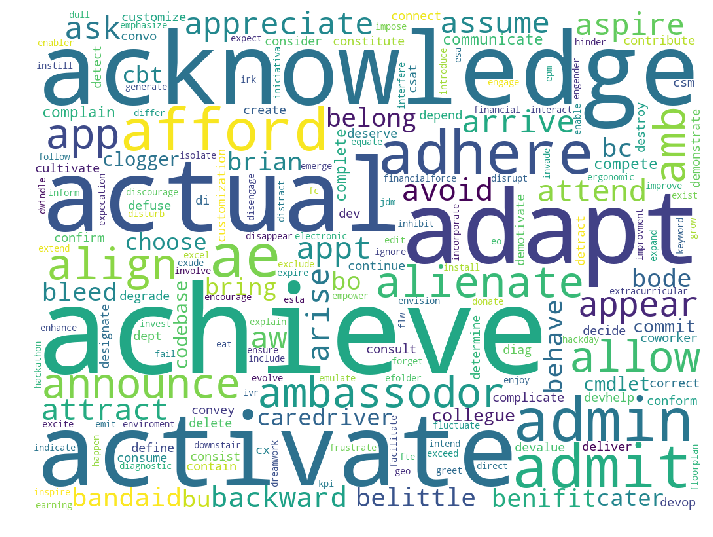

In [69]:
plt.subplots(figsize=(12,12))
wordcloud=WordCloud(background_color="white",width=1024,height=768).generate(" ".join(all_words))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Splitting test for building model and test

In [70]:
y=nlp_df.iloc[:,1].values
x=sparce_matrix
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Random Forest:

In [71]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, random_state=42)
rf.fit(x_train,y_train)
print("accuracy: ",rf.score(x_test,y_test))

accuracy:  0.5985784919653894


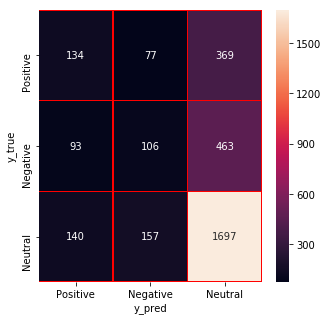

In [72]:
#confussion matrix
y_pred=rf.predict(x_test)
y_true=y_test
from sklearn.metrics import confusion_matrix
import seaborn as sns
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(y_true,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

## Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
print("lr accuracy: ",lr.score(x_test,y_test))

lr accuracy:  0.6263906056860321


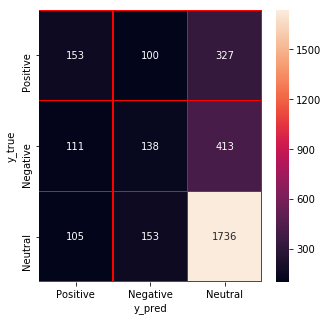

In [74]:
#confussion matrix
y_pred=lr.predict(x_test)
y_true=y_test
from sklearn.metrics import confusion_matrix
import seaborn as sns
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(y_true,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

**Test Size = 16178**
Predict False Positives:
- Negative -> Positive : 111
- Negative -> Neutral : 413

**%False Positives in dangerous zone :**

In [77]:
(111+413)/16178

0.03238966497712944

**~10.9%**

**So, we are safe for predict with the text with acceptable percentage = 100 - 10.9 = 89.1%**

**We can use the trained model for predicting the text question which have the meaning similar to happiness question**